In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.seanfitzgerald.com/wp-content/uploads/070706_7270-1000x666.jpg")

# Capstone Project — The Battle of Neighborhoods in DFW area: Restaurants

------

## A. Introduction/Business Understanding

### A.1 Description of the problem

The Dallas–Fort Worth metroplex, officially designated Dallas–Fort Worth–Arlington , is a conurbated metropolitan statistical area in the U.S. state of Texas encompassing 11 counties. It is the economic and cultural hub of North Texas. Residents of the area also refer to it as DFW (airport code), or the Metroplex. The Dallas–Fort Worth–Arlington metropolitan statistical area's population was 7,573,136 according to the U.S. Census Bureau's 2019 population estimates.

DFW have great people and make it the most populous metropolitan area in both Texas and the Southern United States, the fourth-largest in the U.S. In 2016, the Dallas–Fort Worth metroplex had the highest annual population growth in the United States. Since DFW area is metroplex with a high population and population density, there are great amount of shops, cafeteria and restaurants in the metroplex where the population is dense. The restaurants will grow quickly as well. This research wants to explore what kind of restaurant is DFW area and what numbers of restaurant in different district. Then the investors can choose to the potential area to start up their entrepreneur. 

The investor can see the type of restaurants and numbers to decide where to build their restaurants and distinct from others.

### A.2 Data Description

To consider the problem we can list the data as below:
- The sources of zip, city and population are from the public: Opendatasoft, GitHub and demographics of Texas gov. The .json file has coordinates of the all city of Texas.
- I used Forsquare API to get the most common venues of given district of DFW area.
- For convenience, I deleted the city showed in the public data but not showed in the Foursquare search.
- The result data is the final data I merged, and I will put it in the file.
- You can to to the open data to find the Postal code, Latitude, Longitude and Population.
    1. http://zipatlas.com/us/tx/zip-code-comparison/population-density.htm
    2. https://demographics.texas.gov/Data/TPEPP/Estimates/
    3. https://github.com/OpenDataDE/State-zip-code-GeoJSON
    4. https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/

## B. Methodology

#### B.1. Creating data table and data pre-processing
As a database, I used GitHub repository in my study. My master data df which has the main components District, Latitude and Longitude informations of the city.

#### First of all, we need to import all necessary python library

In [2]:
from bs4 import BeautifulSoup
# import urllib.request as request
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

#  libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [3]:
import pandas as pd 
import numpy as np 
# import random # library for random number generation

# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# # libraries for displaying images
# from IPython.display import Image 
# from IPython.core.display import HTML 
    
# tranforming json file into a dataframe
from pandas.io.json import json_normalize

# basic plotting 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# map plotting
import folium
from folium import IFrame
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
from pandas import read_csv
import folium
import os
import webbrowser
import json
from branca.colormap import linear

### Get all the zip codes in Dallas area

In [5]:
# Load the data

In [6]:
dallas_dis =pd.read_csv("dfwzipcode0205.csv")

In [7]:
dallas_dis

,postalcode,District,Latitude,Longitude,Population
0,75001,Addison,32.961290,-96.83751,8259
1,75002,Allen,33.092846,-96.62447,37216
2,75006,Carrollton,32.960374,-96.89163,46784
3,75007,Carrollton,33.005420,-96.89773,49933
4,75009,Celina,33.327927,-96.76129,4951
...,...,...,...,...,...
267,76487,Poolville,33.009411,-97.89968,1670
268,76490,Whitt,32.958020,-98.01942,60
269,76623,Avalon,32.221421,-96.78320,242
270,76651,Italy,32.175783,-96.88018,3242


#### Map 1

In [8]:
latitude = 32.7762719
longitude = -96.7968559

In [9]:
map_dallas = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(dallas_dis['Latitude'], dallas_dis['Longitude'], dallas_dis['District']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dallas)  
    
map_dallas

### Foursquare API

In [9]:
# you have to go to Foursquare to set a app, then you can get CLIENT_ID, CLIENT_SECRET and VERSION.

In [14]:
CLIENT_ID = 'GGBKKRIQ2LZHKS3MUTLJ31Q1FDSPUXVHYQWZTJJGCHYPIGMH'
CLIENT_SECRET = 'OM2MJ0XGHMMEXPN0CC30V53H25GXCHVKEH5MZQ4S2SAXDDX5' 
VERSION = '20210204'

radius = 1000
LIMIT = 100

In [15]:
# Define function to retreive Data
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
#             location.postalCode,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude',
#                   'location.postalCode',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
# Get Dallas venues data
dallas_venues = getNearbyVenues(names=dallas_dis['District'],
                                latitudes=dallas_dis['Latitude'],
                                longitudes=dallas_dis['Longitude'],
                                radius=radius  
                               )

Addison
Allen
Carrollton
Carrollton
Celina
Carrollton
Allen
Coppell
Flower Mound
Plano
Plano
Plano
Flower Mound
Rockwall
Frisco
Frisco
Irving
Irving
Garland
Garland
Garland
Garland
Garland
Sachse
Grand Prairie
Grand Prairie
Grand Prairie
Grand Prairie
The Colony
Lewisville
Irving
Irving
Irving
Irving
Lake Dallas
Lewisville
Little Elm
McKinney
McKinney
McKinney
Plano
Plano
Lewisville
Prosper
Richardson
Richardson
Richardson
Rockwall
Rowlett
Rowlett
Plano
Murphy
Wylie
Bardwell
Cedar Hill
Crandall
DeSoto
Duncanville
Ennis
Ferris
Forney
Fate
Lancaster
Caddo Mills
Duncanville
Hutchins
Kaufman
Kemp
Lancaster
Mabank
Mesquite
Mesquite
Palmer
Glenn Heights
Rosser
Scurry
Seagoville
Terrell
Terrell
Josephine
Waxahachie
Lavon
Waxahachie
Wilmer
Nevada
Balch Springs
Mesquite
Sunnyvale
Royse City
Dallas
Dallas
Dallas
Dallas
University Park
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
University Park
Dallas
Dallas
Dallas
Dallas
Dallas


In [10]:
dallas_venues = pd.read_csv("dallas_venues_new_zip.csv")

In [11]:
dallas_venues.shape

(5086, 8)

we got 5086 restaurant in DFW area.

In [12]:
dallas_venues.head(12)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,postal code
0,Addison,32.96129,-96.83751,Cindi's N.Y. Delicatessen,32.961864,-96.838873,Diner,75001
1,Addison,32.96129,-96.83751,La Spiga,32.958278,-96.837417,Bakery,75001
2,Addison,32.96129,-96.83751,Elite Cigar Cafe,32.954967,-96.837875,Smoke Shop,75001
3,Addison,32.96129,-96.83751,Enterprise Rent-A-Car,32.960673,-96.838102,Rental Car Location,75001
4,Addison,32.96129,-96.83751,Best Thai Signature,32.954890,-96.841380,Thai Restaurant,75001
5,Addison,32.96129,-96.83751,Fogo de Chao Brazilian Steakhouse,32.953782,-96.837738,Churrascaria,75001
6,Addison,32.96129,-96.83751,Chuy's Tex-Mex,32.953575,-96.835815,Mexican Restaurant,75001
7,Addison,32.96129,-96.83751,Anime Pop,32.954681,-96.841196,Hobby Shop,75001
8,Addison,32.96129,-96.83751,Chamberlains Fish Market Grill,32.954442,-96.835328,Seafood Restaurant,75001
9,Addison,32.96129,-96.83751,La Ventana,32.953866,-96.839757,Mexican Restaurant,75001


In [13]:
dallas_restaurant = dallas_venues[dallas_venues['Venue Category'].str.contains('Restaurant')]
dallas_restaurant.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,postal code
4,Addison,32.96129,-96.83751,Best Thai Signature,32.954890,-96.841380,Thai Restaurant,75001
6,Addison,32.96129,-96.83751,Chuy's Tex-Mex,32.953575,-96.835815,Mexican Restaurant,75001
8,Addison,32.96129,-96.83751,Chamberlains Fish Market Grill,32.954442,-96.835328,Seafood Restaurant,75001
9,Addison,32.96129,-96.83751,La Ventana,32.953866,-96.839757,Mexican Restaurant,75001
10,Addison,32.96129,-96.83751,Cantina Laredo,32.953413,-96.834227,Mexican Restaurant,75001


In [14]:
print('There are {} uniques Venue categories in Dallas.'.format(len(dallas_venues['Venue Category'].unique())))
print('--------------------------------------')
print('There are {} uniques Restaruant categories in Dallas.'.format(len(dallas_restaurant['Venue Category'].unique())))

There are 341 uniques Venue categories in Dallas.
--------------------------------------
There are 46 uniques Restaruant categories in Dallas.


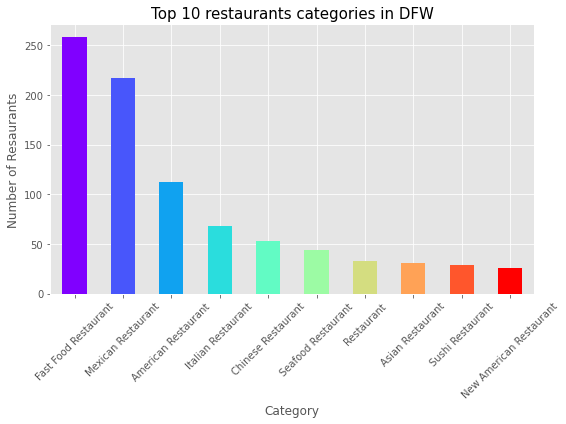

In [15]:
res_category = dallas_restaurant.groupby("Venue Category").count().sort_values('District', ascending = False)
res_category = res_category['District'][:10]

# Assign color for each category
x = np.arange(len(res_category))
ys = [i + x + (i*x)**2 for i in range(len(res_category))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


plt.style.use('ggplot')

res_category.plot(kind='bar', figsize=(8,6), color=rainbow )

plt.xlabel('Category', fontsize=12) # add to x-label to the plot
plt.xticks(rotation=45)
plt.ylabel('Number of Resaurants', fontsize=12) # add y-label to the plot
plt.title('Top 10 restaurants categories in DFW', fontsize=15)
plt.tight_layout()
plt.show()

We got 10 category of restaurant in DFW area.

#### Use onehot to show ther frequeny in different districts.

In [16]:
# one hot encoding
dallas_onehot = pd.get_dummies(dallas_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
dallas_onehot['District'] = dallas_restaurant['District'] 

# move neighbourhood column to the first column
fixed_columns = [dallas_onehot.columns[-1]] + list(dallas_onehot.columns[:-1])
dallas_onehot = dallas_onehot[fixed_columns]

dallas_onehot.head()

,District,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dumpling Restaurant,Ethiopian Restaurant,...,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
4,Addison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,Addison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Addison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Addison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Addison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
resaurant_count = dallas_onehot.groupby('District').count().reset_index().sum(axis=1)
dallas_grouped = dallas_onehot.groupby('District').mean().reset_index()
dallas_grouped 

,District,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dumpling Restaurant,Ethiopian Restaurant,...,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Addison,0.000000,0.058824,0.0,0.058824,0.000000,0.0,0.0,0.0,0.0,...,0.058824,0.058824,0.0,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0
1,Allen,0.000000,0.090909,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.090909,0.090909,0.0,0.0,0.0,0.0
2,Alvarado,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,Arlington,0.095238,0.047619,0.0,0.000000,0.047619,0.0,0.0,0.0,0.0,...,0.000000,0.071429,0.0,0.0,0.023810,0.047619,0.0,0.0,0.0,0.0
4,Azle,0.000000,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ut Sw Medical Center,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
65,Venus,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
66,Watauga,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
67,Wilmer,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [18]:
num_top_venues = 5

for hood in dallas_grouped['District']:
    print("----"+hood+"----")
    temp = dallas_grouped[dallas_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Addison----
                             venue    freq
0               Mexican Restaurant  0.2353
1               Seafood Restaurant  0.1765
2               Italian Restaurant  0.1176
3  Southern / Soul Food Restaurant  0.0588
4                 Asian Restaurant  0.0588


----Allen----
                  venue    freq
0  Fast Food Restaurant  0.3636
1  Pakistani Restaurant  0.0909
2      Asian Restaurant  0.0909
3    Mexican Restaurant  0.0909
4       Thai Restaurant  0.0909


----Alvarado----
                     venue  freq
0       Mexican Restaurant   1.0
1  South Indian Restaurant   0.0
2  New American Restaurant   0.0
3  North Indian Restaurant   0.0
4     Pakistani Restaurant   0.0


----Arlington----
                  venue    freq
0  Fast Food Restaurant  0.2143
1    Mexican Restaurant  0.1905
2   American Restaurant  0.0952
3      Sushi Restaurant  0.0714
4    Chinese Restaurant  0.0476


----Azle----
                  venue  freq
0  Fast Food Restaurant   0.4
1    Chinese R

                  venue    freq
0    Mexican Restaurant  0.3636
1  Fast Food Restaurant  0.2727
2   Japanese Restaurant  0.1818
3    Italian Restaurant  0.1818
4   American Restaurant  0.0000


----Murphy----
                  venue    freq
0  Fast Food Restaurant  0.2632
1    Mexican Restaurant  0.1579
2   American Restaurant  0.1053
3   Japanese Restaurant  0.1053
4       Thai Restaurant  0.0526


----North Richland Hills----
                     venue   freq
0     Fast Food Restaurant  0.750
1      American Restaurant  0.125
2       Italian Restaurant  0.125
3  South Indian Restaurant  0.000
4  North Indian Restaurant  0.000


----Pilot Point----
                             venue  freq
0              American Restaurant   0.5
1             Fast Food Restaurant   0.5
2  Southern / Soul Food Restaurant   0.0
3          North Indian Restaurant   0.0
4             Pakistani Restaurant   0.0


----Plano----
                  venue  freq
0  Fast Food Restaurant   0.2
1       Thai Restaur

we can see the first to fifth restaurant in different district.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = dallas_grouped['District']

for ind in np.arange(dallas_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dallas_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Addison,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Sushi Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Asian Restaurant,Tex-Mex Restaurant,Thai Restaurant
1,Allen,Fast Food Restaurant,Tex-Mex Restaurant,Italian Restaurant,Indian Restaurant,Pakistani Restaurant,Mexican Restaurant,Asian Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Chinese Restaurant
2,Alvarado,Mexican Restaurant,French Restaurant,Latin American Restaurant,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant,Greek Restaurant
3,Arlington,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Sushi Restaurant,Mediterranean Restaurant,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant
4,Azle,Fast Food Restaurant,Seafood Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
64,Ut Sw Medical Center,Mexican Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant
65,Venus,Mexican Restaurant,Fast Food Restaurant,French Restaurant,Latin American Restaurant,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant
66,Watauga,Fast Food Restaurant,Vietnamese Restaurant,French Restaurant,Latin American Restaurant,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant
67,Wilmer,Fast Food Restaurant,Vietnamese Restaurant,French Restaurant,Latin American Restaurant,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant


### Clustering

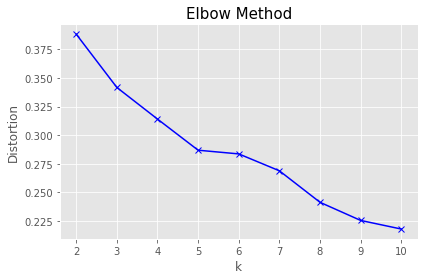

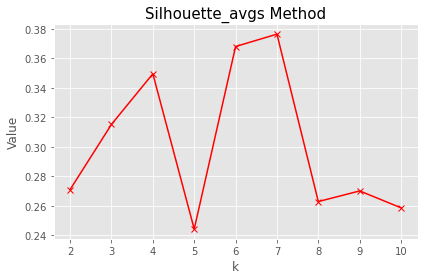

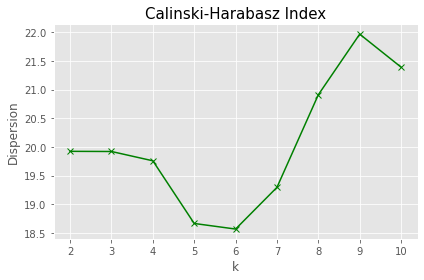

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics  

X = dallas_grouped.drop('District', 1)

# Best k
K=range(2,11)

distortions = []
silhouette_avgs = []
calinski_avgs = []
davies_avgs = []

for kclusters in K:
    #Train Model
    kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0, n_init=50).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    silhouette_avgs.append(metrics.silhouette_score(X, kmeans.labels_))
    calinski_avgs.append(metrics.calinski_harabasz_score(X, kmeans.labels_))
    davies_avgs.append(metrics.davies_bouldin_score(X, kmeans.labels_))
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', fontsize=12)
plt.ylabel('Distortion', fontsize=12)
plt.title('Elbow Method', fontsize=15)
plt.tight_layout()
plt.show()


plt.plot(K, silhouette_avgs, 'bx-', color='r')
plt.xlabel('k', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Silhouette_avgs Method', fontsize=15)
plt.tight_layout()
plt.show()

plt.plot(K, calinski_avgs, 'bx-', color='g')
plt.xlabel('k', fontsize=12)
plt.ylabel('Dispersion', fontsize=12)
plt.title('Calinski-Harabasz Index', fontsize=15)
plt.tight_layout()
plt.show()

#### Let's set k = 7.

In [21]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0, n_init=12).fit(X)


# add clustering labels
districts_venues_sorted['Cluster Labels'] = kmeans.labels_


## C. Results

#### Let's merge those new variables with related cluster informations in dallas_merged data.

In [22]:
# merge taipei_grouped with dallas_data to add latitude/longitude for each neighbourhood
dallas_clustering_new = pd.read_csv("dallas_clustering_new_pop_rest.csv")

In [23]:
dallas_clustering_new.head(12)

,postalcode,District,Latitude,Longitude,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,Population,Restaurant Count
0,75001,Addison,32.961290,-96.83751,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Sushi Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Asian Restaurant,Tex-Mex Restaurant,Thai Restaurant,0,8259,65
1,75002,Allen,33.092846,-96.62447,Fast Food Restaurant,Tex-Mex Restaurant,Italian Restaurant,Indian Restaurant,Pakistani Restaurant,Mexican Restaurant,Asian Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,5,37216,18
2,75006,Carrollton,32.960374,-96.89163,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,South American Restaurant,Asian Restaurant,Greek Restaurant,Ramen Restaurant,0,46784,32
3,75007,Carrollton,33.005420,-96.89773,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,South American Restaurant,Asian Restaurant,Greek Restaurant,Ramen Restaurant,0,49933,6
4,75010,Carrollton,33.030556,-96.89328,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,South American Restaurant,Asian Restaurant,Greek Restaurant,Ramen Restaurant,0,13202,25
5,75013,Allen,33.106582,-96.69402,Fast Food Restaurant,Tex-Mex Restaurant,Italian Restaurant,Indian Restaurant,Pakistani Restaurant,Mexican Restaurant,Asian Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,5,11624,34
6,75019,Coppell,32.967341,-96.98656,American Restaurant,Fast Food Restaurant,Tex-Mex Restaurant,Mexican Restaurant,Vietnamese Restaurant,Greek Restaurant,Mediterranean Restaurant,Restaurant,Japanese Restaurant,Chinese Restaurant,0,35737,60
7,75022,Flower Mound,33.024778,-97.10206,Sushi Restaurant,Thai Restaurant,Italian Restaurant,Indian Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,French Restaurant,Korean Restaurant,Japanese Restaurant,Indian Chinese Restaurant,0,13824,3
8,75023,Plano,33.054671,-96.73506,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Korean Restaurant,Indian Restaurant,Mexican Restaurant,0,46635,17
9,75024,Plano,33.077070,-96.79859,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Korean Restaurant,Indian Restaurant,Mexican Restaurant,0,19743,17


In [24]:
level = []
for i in range(0,len(dallas_clustering_new)):
    if (dallas_clustering_new['Population'][i] < 10000):
        level.append("Level_1")
    elif (dallas_clustering_new['Population'][i] >= 10000 and dallas_clustering_new['Population'][i] < 20000):
        level.append("Level_2")
    elif (dallas_clustering_new['Population'][i] >= 20000 and dallas_clustering_new['Population'][i] < 30000):
        level.append("Level_3")
    elif (dallas_clustering_new['Population'][i] >= 30000 and dallas_clustering_new['Population'][i] < 40000):
        level.append("Level_4")
    elif (dallas_clustering_new['Population'][i] >= 40000 and dallas_clustering_new['Population'][i] < 50000):
        level.append("Level_5")
    else:
        level.append("Level_6")   

dallas_clustering_new['Population_level'] = level
dallas_clustering_new.head()

,postalcode,District,Latitude,Longitude,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,Population,Restaurant Count,Population_level
0,75001,Addison,32.961290,-96.83751,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Sushi Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Asian Restaurant,Tex-Mex Restaurant,Thai Restaurant,0,8259,65,Level_1
1,75002,Allen,33.092846,-96.62447,Fast Food Restaurant,Tex-Mex Restaurant,Italian Restaurant,Indian Restaurant,Pakistani Restaurant,Mexican Restaurant,Asian Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,5,37216,18,Level_4
2,75006,Carrollton,32.960374,-96.89163,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,South American Restaurant,Asian Restaurant,Greek Restaurant,Ramen Restaurant,0,46784,32,Level_5
3,75007,Carrollton,33.005420,-96.89773,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,South American Restaurant,Asian Restaurant,Greek Restaurant,Ramen Restaurant,0,49933,6,Level_5
4,75010,Carrollton,33.030556,-96.89328,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,South American Restaurant,Asian Restaurant,Greek Restaurant,Ramen Restaurant,0,13202,25,Level_2


In [25]:
result = dallas_clustering_new

In [26]:
result.to_excel(r'C:\Users\utdal\Desktop\python\Coursera\IBM\09\Final Project Dallas\result.xlsx', sheet_name='result', index = False)

### Make a map 

#### Map 1

In [27]:
# The lat and lon of dallas
dallas_latitude = 32.7762719
dallas_longitude = -96.7968559

In [30]:
# Dallas latitude and longitude values
dallas_latitude = 32.7762719
dallas_longitude = -96.7968559

# create map
map_clusters = folium.Map(location=[dallas_latitude, dallas_longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, dis, restaurant, cluster in zip(result['Latitude'], result['Longitude'], result['District'], result['Restaurant Count'],result['Cluster Labels']):
    label = folium.Popup('\n/\n' + ' Cluster ' + str(cluster)) 

    folium.CircleMarker(
        [lat, lon],
        radius=restaurant/10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


map_clusters


### Cluster the restaruant type

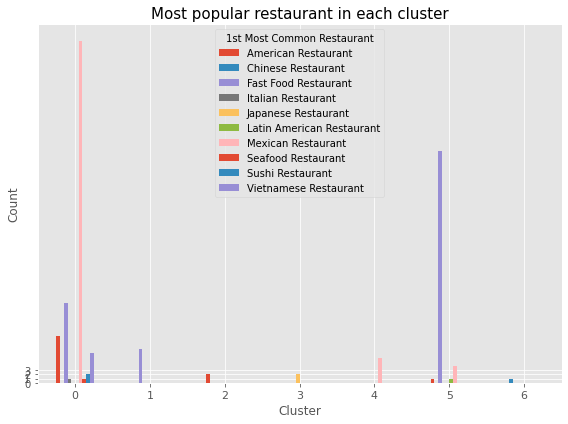

In [116]:
dallas_clustering_new.groupby(['Cluster Labels', '1st Most Common Restaurant']).count()['Restaurant Count'].unstack().plot(kind='bar', figsize=(8,6))

plt.xlabel('Cluster', fontsize=12) # add to x-label to the plot
plt.xticks(rotation=0, fontsize=11) #Rotate Xticks label text
plt.ylabel('Count', fontsize=12) # add y-label to the plot
plt.yticks([0,1,2,3])
plt.title('Most popular restaurant in each cluster', fontsize=15)
plt.tight_layout()
plt.show()

#### The seven restaurant cluster in DFW area.

### Show Map in District

#### Map 3

In [33]:
# display Dallas
dallas_map_clusters  = folium.Map(location=[latitude, longitude], zoom_start=10)

In [ ]:
# create map and display it
dallas_map_clusters = folium.Map(location=[dallas_latitude, dallas_longitude], zoom_start=11.5, tiles='cartodbpositron')

# Create choropleth for population of each district
dallas_geo = r'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json'

dallas_map_clusters.choropleth(
    geo_data=dallas_geo ,
    data=result,
    columns=['District', 'Population'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Restaurant in DFW area',
    highlight=True
)

# add markers to the map
markers_colors = []

for lat, lon, poi, restaurant, cluster, population in zip(result['Latitude'], result['Longitude'], result['District'], result['Restaurant Count'], result['Cluster Labels'], result['Population']):
    label = folium.Popup( str(poi) + " / " + str(cluster) + "-" + str(label) + " / ", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=restaurant/10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(dallas_map_clusters)

#display map
dallas_map_clusters

### Show Map in clean way

#### Map 4

In [236]:
# Dallas, TX
latitude = 32.7762719
longitude = -96.7968559
dallas_geo = 'C:/Users/utdal/Desktop/python/Coursera/IBM/09/dallas-zip-code.geojson'
# display Dallas
dallas_map_clusters_1  = folium.Map(location=[latitude, longitude], zoom_start=9.5)

In [237]:
# create map and display it
dallas_map_clusters_1 = folium.Map(location=[dallas_latitude, dallas_longitude], zoom_start=9.5, tiles='cartodbpositron')

# # Create choropleth for population of each district
# dallas_geo = r'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json'

dallas_map_clusters.choropleth(
    geo_data=dallas_geo ,
    data=result,
    columns=['District', 'Population'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Restaurant in Dallas area',
    highlight=True
)

# add markers to the map
markers_colors = []

for lat, lon, poi, restaurant, cluster, population in zip(result['Latitude'], result['Longitude'], result['District'], result['Restaurant Count'], result['Cluster Labels'], result['Population']):
    label = folium.Popup( str(poi) + " / " + str(cluster) + "-" + str(label) + " / ", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=restaurant/10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(dallas_map_clusters_1)

#display map
dallas_map_clusters_1

---

## D. Discussion

### 1. Interpret the Maps
1. Maps 1: The cites in DFW area. One city stands for one zip code.
2. Maps 2: The restaurants in DFW area. The bigger the bubble stands for the more restaurants and vice versa. The different color shows the different groups.
3. Maps 3: The restaurants in DFW area, which is showed in district. Therefore, we can see which district has the most restaurants.
4. Maps 4: The restaurants in DFW area, which is shown in clear map.

### 2. Name for Clustering
#### According to the clustering, we got 7 groups.
1. Great Dallas area metro.
2. Fast Food lover: Between cities and border area: Sachse, Hutchins and Terrel.
3. The border area: Prosper and Ponder.
4. Frisco area.
5. Mexican Food lover: Lavon, Alvarado, Euless.
6. Great Fort Worth area.
7. Sanger: Chinese Food Lover.

#### Explanation for the clustering.
1. Great Dallas area metro: Since Great Dallas area is the largest city in DFW area, they got a lot of choices. Most of them choose Mexican food because Mexican restaurant are the most in DFW area because these two types of restaurants are more than other restaurants.
2. Fast Food lover: The area between cities and border area: Sachse, Hutchins and Terrel. Basically the restaurants are below 20, so they had few choices.
3. The border area: Prosper and Ponder.The top three restaurants are American food, French food, and Italian food.
4. Frisco area: Frisco had the a lot of Japanese food and people like to eat.
5. Mexican Food lover: Lavon, Alvarado, Euless area.
6. Great Fort Worth area: People got top 2 choices: Fast food and Mexican food.
7. Sanger: Chinese Food Lover. Sanger has more Chinese restaurant than others.


### 3. Investors View

1. Investors can see the size of bubble and decide where to start up their new restaurants.
2. Investors can use the most popular restaurants in different district table and find the potential chance. For example, although the most restaurants in Plano and Allen are Mexican restaurants, Chinese restaurants are the third place in Plano. However, Chinese restaurants stand only 10th in Allen.

## E. Conclusion

1. Investors can open their restaurants according to the final file--result. In this file, we will know the most popular restaurants, the population and numbers of restaurants in specific area.
2. The bubble in map shows the first and second metroplex in DFW area, which are Great Dallas and Fort Worth area. Investors can choose their ideal location to start up.

## G. References:
   - [1] DFW Wiki, https://en.wikipedia.org/wiki/DFW
   - [2] The demographics Texas of government, https://demographics.texas.gov/
   - [3] Forsquare API, https://foursquare.com/
   - [4] Opendatasoft, https://public.opendatasoft.com/    